# Case study for data reuse with EBRAINS Knowledge Graph: A step-by-step explanation 

Alix E.Bonard, Laura Morel and Peyman Najafi

Paris-Saclay Institute of Neuroscience, CNRS, Université Paris-Saclay, France.

November 2024, NeuralNet2024 - Minischool - Hands-on case studies for data reuse 


In this notebook we will look more closely at the EBRAINS dataset "[Excitability profile of CA1 pyramidal neurons in APPPS1 Alzheimer disease mice and control littermates (v1)](https://search.kg.ebrains.eu/#bd5f91ff-e829-4b85-92eb-fc56991541f1)", contributed by Ana Rita Salgueiro-Pereira and Hélène Marie from the Université Côte d’Azur in Valbonne, France.

As we can see from the dataset description,

<i>This dataset provides an analysis of the intrinsic electrophysiological properties of CA1 excitatory hippocampal
neurons in a mouse model of Alzheimer’s Disease (AD) at two age points: a presymptomatic age (3-4
months) and a symptomatic age: (9-10 months).</i>
More information is available in the [Data Descriptor](https://search.kg.ebrains.eu/instances/bd5f91ff-e829-4b85-92eb-fc56991541f1).

This dataset forms part of the results reported in Vitale, P., Salgueiro-Pereira, A. R., Lupascu, C. A., Willem, M., Migliore, R., Migliore, M., & Marie, H.(2021) Analysis of Age-Dependent Alterations in Excitability Properties of CA1 Pyramidal Neurons in an APPPS1 Model of Alzheimer’s Disease. *Frontiers in Aging Neuroscience* **13** https://doi.org/10.3389/fnagi.2021.668948

This notebook was modified from [Studies of data reuse: Excitability profile of CA1 pyramidal neurons in APPPS1 Alzheimer disease mice and control littermates](https://github.com/NeuroPSI-Neuroinformatics/case-studies-for-data-reuse/blob/main/10.25493-YJFW-HPY/SalgueiroPereiraMarie2020.ipynb) by Isaure Botherel and Andrew P.Davison. 


**In this notebook we will demonstrate how to access, to explore and to reuse the data from this study using fairgraph and neo packages. We will also visualize the data with matplotlib by focusing on providing detailed information for data reuse.**

### Finding a dataset

This section aims to teach users how to programatically or manually find and retrieve datasets with specific metadata on the EBRAINS Knowledge Graph (KG). The following tools will be used:
- the python library fairgraph
- the EBRAINS website KGSearch
- the EBRAINS website KGQueryBuilder

#### Using [KGSearch](https://search.kg.ebrains.eu/?category=Dataset)

[KGSearch](https://search.kg.ebrains.eu/?category=Dataset) is a quick and easy way to browse EBRAINS datasets. Once a dataset is selected, users can use the Python library [fairgraph](https://github.com/HumanBrainProject/fairgraph) to download the dataset and/or see its metadata using its client. Since we are already working in a Jupyter lab linked to our EBRAINS account, we simply need to create a client object **KGClient** to be able to retrieve metadata on the KG. For more instructions on how to use fairgraph in other environments, please refer to the github page linked above.

In [1]:
from fairgraph import KGClient
kg_client = KGClient()

**EXERCISE**\
To familiarize ourselves with KGSearch, let us try to find a dataset with the following characteristics:
- Technique used is **whole-cell patch clamp**
- Cell type is **CA1 pyramidal neurons**
- Sujects are **model mice for Alzheimer's disease**

Those parameters should lead you to [this dataset](https://search.kg.ebrains.eu/instances/bd5f91ff-e829-4b85-92eb-fc56991541f1)

The KG uses the [openMinds](https://github.com/openMetadataInitiative/openMINDS) framework for metadata. In this framework, a **Dataset** instance is linked to one or more **DatasetVersion** instances with unique DOIs. *fairgraph* allows us to directly download the dataset using its DOI.

In [2]:
import fairgraph.openminds.core as omcore
import os 
import zipfile

dataset_version_doi = "10.25493/YJFW-HPY"

dataset_versions = omcore.DatasetVersion.list(
    kg_client, 
    digital_identifier__identifier=dataset_version_doi,
    follow_links={"repository": {"files": {}}},
    scope="any"
)

dataset_version = dataset_versions[0]

if not os.path.exists("downloads"):  # only download the dataset if it hasn't been downloaded previously
    dataset_path = dataset_version.download("downloads", kg_client, accept_terms_of_use=True)[0]
else:
    dataset_path = "downloads/ext-d000001_ADNeuronModel_pub"
with zipfile.ZipFile(dataset_path, "r") as z:
    z.extractall("downloads")

Cannot yet handle case where self.path is a list: Property(name='describes', types=(<class 'fairgraph.openminds.core.research.behavioral_protocol.BehavioralProtocol'>, <class 'fairgraph.openminds.core.research.protocol.Protocol'>, <class 'fairgraph.openminds.ephys.device.electrode_array_usage.ElectrodeArrayUsage'>, <class 'fairgraph.openminds.ephys.device.electrode_usage.ElectrodeUsage'>, <class 'fairgraph.openminds.ephys.device.pipette_usage.PipetteUsage'>, <class 'fairgraph.openminds.specimen_prep.device.slicing_device_usage.SlicingDeviceUsage'>), path='['^vocab:describedIn', '^vocab:metadataLocation']', required=False, multiple=True)
/opt/app-root/src/.local/lib/python3.8/site-packages/fairgraph/properties.py:370: UserWarning: Mixed types in Property(name='is_location_of', types=(<class 'fairgraph.openminds.ephys.entity.recording.Recording'>, <class 'fairgraph.openminds.sands.atlas.parcellation_terminology_version.ParcellationTerminologyVersion'>), path='^vocab:dataLocation', requir

FileNotFoundError: [Errno 2] No such file or directory: 'downloads/ext-d000001_ADNeuronModel_pub'

#### More sophisticated queries with [KGQueryBuilder](https://query.kg.ebrains.eu)

To query the KG programatically, instead of using the KGSearch website, we can use the KGQuery object from fairgraph. However, the query must be serializable in JSON-LD to be valid. The [KGQueryBuilder](https://query.kg.ebrains.eu) website aims to help users write queries for the EBRAINS Knowledge Graph.
Using this tool, try and find the dataset previously found. [A tutorial](https://docs.kg.ebrains.eu/9b511d36d7608eafc94ea43c918f16b6/tutorials.html) is available to learn how to use this tool. Once you think you have the correct query, paste it below to check if it is correct.
**Note:** if your query contains the words `true` or `false` without quotes, remember to capitalize the first letter to make it interpretable by Python

**EXERCISE: Build a query with KG Query builder**

In [ ]:
from pprint import pprint
query = {
    # PASTE YOUR QUERY HERE
}
results = kg_client.query(query)
pprint(results.data, width=200)

This is what your results should look like:

In [ ]:
query_solution = {
  "@context": {
    "@vocab": "https://core.kg.ebrains.eu/vocab/query/",
    "query": "https://schema.hbp.eu/myQuery/",
    "propertyName": {
      "@id": "propertyName",
      "@type": "@id"
    },
    "path": {
      "@id": "path",
      "@type": "@id"
    }
  },
  "meta": {
    "type": "https://openminds.ebrains.eu/core/DatasetVersion",
    "responseVocab": "https://schema.hbp.eu/myQuery/"
  },
  "structure": [
    {
      "propertyName": "query:digitalIdentifier",
      "path": "https://openminds.ebrains.eu/vocab/digitalIdentifier",
      "structure": {
        "propertyName": "query:identifier",
        "path": "http://schema.org/identifier"
      }
    },
    {
      "propertyName": "query:identifier",
      "path": "http://schema.org/identifier"
    },
    {
      "propertyName": "query:versionIdentifier",
      "path": "https://openminds.ebrains.eu/vocab/versionIdentifier"
    },
    {
      "propertyName": "query:shortName",
      "path": "https://openminds.ebrains.eu/vocab/shortName",
      "sort": True
    },
    {
      "propertyName": "query:fullName",
      "path": "https://openminds.ebrains.eu/vocab/fullName"
    },
    {
      "propertyName": "query:studiedSpecimen",
      "path": "https://openminds.ebrains.eu/vocab/studiedSpecimen",
      "required": True,
      "structure": [
        {
          "propertyName": "query:species",
          "path": "https://openminds.ebrains.eu/vocab/species",
          "required": True,
          "structure": {
            "propertyName": "query:synonym",
            "path": "https://openminds.ebrains.eu/vocab/synonym",
            "required": True,
            "filter": {
              "op": "CONTAINS",
              "value": "mouse"
            }
          }
        },
        {
          "propertyName": "query:studiedState",
          "path": "https://openminds.ebrains.eu/vocab/studiedState",
          "required": True,
          "structure": {
            "propertyName": "query:pathology",
            "path": "https://openminds.ebrains.eu/vocab/pathology",
            "required": True,
            "structure": {
              "propertyName": "query:name",
              "path": "https://openminds.ebrains.eu/vocab/name",
              "required": True,
              "filter": {
                "op": "CONTAINS",
                "value": "Alzheimer"
              }
            }
          }
        }
      ]
    },
    {
      "propertyName": "query:technique",
      "path": "https://openminds.ebrains.eu/vocab/technique",
      "required": True,
      "structure": {
        "propertyName": "query:name",
        "path": "https://openminds.ebrains.eu/vocab/name",
        "required": True,
        "filter": {
          "op": "CONTAINS",
          "value": "whole cell patch clamp"
        }
      }
    }
  ]
}

results = kg_client.query(query_solution)
pprint(results.data, width=200)

## Structure of Folder 

os.listdir()The data are organized into four folders, "APPPS1_mouse_model_3-4_months", "control_3-4_months", "APPPS1_mouse_model_9-10_months", "control_9-10_months", each of which contains a number of files with the extension ".abf".

It should be noted that the dataset does not contain the data for mice at age 1 month that are shown in the associated paper (Vitale et al., 2021).

We know from the dataset metadata that these are electrophysiology data, and more specifically that they were obtained with the whole cell patch clamp technique in current clamp mode. We will therefore use the [Neo library](https://neo.readthedocs.io/) to read the data files, since it is able to read data from a large number of electrophysiology file formats.

In [3]:
os.listdir()

['Fig1.png',
 'Fig2.png',
 'Figmatplotlib.png',
 'Minischool_NeuralNet2024_data_example.xlsx',
 'Neo_architecture.png',
 'SalgueiroPereiraMarie2020-solutions.ipynb',
 'SalgueiroPereiraMarie2020.ipynb',
 '.ipynb_checkpoints',
 'downloads']

In [4]:
data_folder = os.path.abspath(os.listdir()[8]) # gets the path of the download folder in the working directory
data_folder

'/opt/app-root/src/NeuralNet-2024-Minischool/case-studies/01-Case study for data reuse with EBRAINS knowledge Graph/downloads'

In [5]:
path_folders_list = []
sub_folders_list = []
files_list = []
for path_folders, sub_folders, files in os.walk(data_folder):
    path_folders_list.append(path_folders)
    sub_folders_list.append(sub_folders)
    files_list.append(files)

print(f"The dataset contains {len(path_folders_list[1:])} folders corresponding to the experimental groups")
for i in range (1, (len(path_folders_list))):
    print(f"The folfer {path_folders_list[i]} contains {len(files_list[i])} files with the extension .abf ({files_list[i]})")


The dataset contains 4 folders corresponding to the experimental groups
The folfer /opt/app-root/src/NeuralNet-2024-Minischool/case-studies/01-Case study for data reuse with EBRAINS knowledge Graph/downloads/APPPS1_mouse_model_3-4_months contains 17 files with the extension .abf (['191129000_S23.abf', '191129002_S23.abf', '191129003_S23.abf', '191129006_rita_S23.abf', '191129007_rita_S23.abf', '191129008_rita_S23.abf', '191129009_rita_S23.abf', '191202000_rita_S26.abf', '191202001_rita_S26.abf', '191202002_rita_S23.abf', '191202003_rita_S23.abf', '191202004_rita_S22.abf', '191202005_rita_S22.abf', '191202006_rita_S22.abf', '191202007_rita_S22.abf', '191202008_rita_S22.abf', '191202009_rita_S22.abf'])
The folfer /opt/app-root/src/NeuralNet-2024-Minischool/case-studies/01-Case study for data reuse with EBRAINS knowledge Graph/downloads/APPPS1_mouse_model_9-10_months contains 22 files with the extension .abf (['191122000_S77.abf', '191122000_rita_S77.abf', '191122001_rita_S77.abf', '19112

## Exploring Neo package: FAIR and flexible tool to analyze/visualize your data 
### FAIR principle related to Neo:
**I1: (meta)data use a formal, accessible, shared, and broadly applicable language for knowledge representation.**\
**I3: (meta)data include qualified references to other (meta)data**\
**R1.3: (meta)data meet domain-relevant community standards.**


The objective here is to provide an example of the use of Neo package. In this part, you will find ressource to analyze and visualize your electrophysiologcal data. Don't hesitate to check the links to have more analyzing option (.i.e extracelullar recordings).

In [6]:
from glob import glob
import numpy as np
from neo import get_io

Neo loads data into a hierarchical structure: Blocks contain Segments, which contain the actual data.



![title](Neo_architecture.png)

Let us look at the structure of the first three files:

In [7]:
for file_path in glob("downloads/*/*.abf")[:3]:
    io = get_io(file_path)
    print(io)

AxonIO: downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf
nb_block: 1
nb_segment:  [13]
signal_streams: [Signals (chans: 1)]
signal_channels: [IN0]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/APPPS1_mouse_model_3-4_months/191129002_S23.abf
nb_block: 1
nb_segment:  [13]
signal_streams: [Signals (chans: 1)]
signal_channels: [IN0]
spike_channels: []
event_channels: [Tag]

AxonIO: downloads/APPPS1_mouse_model_3-4_months/191129003_S23.abf
nb_block: 1
nb_segment:  [13]
signal_streams: [Signals (chans: 1)]
signal_channels: [IN0]
spike_channels: []
event_channels: [Tag]



**EXERCISE: Knowing the structure of Neo object, retrieve the signal ?**

Hint:

block = get_io("downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf").read(lazy=True) #using read(lazy=True) implies to use .load() to retrieve signals\
...\
You can have a look there: https://neo.readthedocs.io/en/latest/read_and_analyze.html#getting-started

--\
Output:

AnalogSignal with 1 channels of length 50000; units mV; datatype float32\
name: 'Signals'\
annotations: {'stream_id': '0'}\
sampling rate: 10000.0 Hz\
time: 0.020999999999999998 s to 5.021 s

In [8]:
# Solution 
block = get_io("downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf").read(lazy=True)
example_signal = block[0].segments[0].analogsignals[0].load()
example_signal

AnalogSignal with 1 channels of length 50000; units mV; datatype float32
name: 'Signals'
annotations: {'stream_id': '0'}
sampling rate: 10000.0 Hz
time: 0.020999999999999998 s to 5.021 s

**EXERCISE: Explore the proprieties of the object in order to obtain the raw data, the time (with and without units), the units and the sampling rate**

HINT: Here the objective is to explore the propeties of a neo object.\
You can have a look here for more help: https://neo.readthedocs.io/en/latest/read_and_analyze.html#numpy

In [ ]:
print(f"Raw signal:  {...}")
print(f"time with unit:  {...}")
print(f"time without unit:  {...}")
print(f"sampling rate:  {...}")
print(f"sampling rate without unit:  {...}")
print(f"time unit:  {...}")
print(f"signal unit:  {...}")

In [9]:
# Solution
print(f"Raw signal:  {example_signal.magnitude.flatten()}")
print(f"time with unit:  {example_signal.times}")
print(f"time without unit:  {example_signal.times.magnitude}")
print(f"sampling rate:  {example_signal.sampling_rate}")
print(f"sampling rate without unit:  {example_signal.sampling_rate.magnitude}")
print(f"time unit:  {example_signal.times.dimensionality}")
print(f"signal unit:  {example_signal.units.dimensionality}")

Raw signal:  [-66.19263  -66.3147   -66.223145 ... -66.07056  -66.13159  -66.00952 ]
time with unit:  [0.021  0.0211 0.0212 ... 5.0207 5.0208 5.0209] s
time without unit:  [0.021  0.0211 0.0212 ... 5.0207 5.0208 5.0209]
sampling rate:  10000.0 Hz
sampling rate without unit:  10000.0
time unit:  s
signal unit:  mV


These all have a consistent structure: they're in Axon format, contain a single block containing 13 segments, and each segment contains a single recorded signal containing a single channel.\
We know from the associated paper that current pulses of increasing intensity were injected into the neurons, in steps of 50 pA from -200 to 400 pA.\
This will be useful for the next part.

In [10]:
current_pulse_amplitudes = np.arange(-200, 401, 50)  # we set the upper limit above 400, so that the final value is 400
print(current_pulse_amplitudes)
print(f"Number of current pulses: {len(current_pulse_amplitudes)}")

[-200 -150 -100  -50    0   50  100  150  200  250  300  350  400]
Number of current pulses: 13


Now let's plot the data from one of the files:

**EXERCISE: Plot the membrane potential(signal) over the time for all segments**

HINT: You can have a look here: https://neo.readthedocs.io/en/latest/read_and_analyze.html#getting-started

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_data(file_path):
    data = get_io(file_path).read(lazy=True)
# write this function to obtain the figure below

plot_data("downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf")

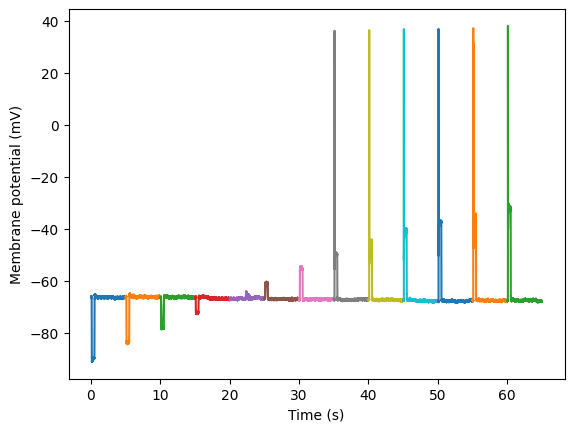

In [11]:
# Solution
%matplotlib inline
import matplotlib.pyplot as plt

def plot_data(file_path):
    data = get_io(file_path).read(lazy=True) # Note data = block 
    for segment in data[0].segments:
        signal = segment.analogsignals[0].load()
        plt.plot(signal.times, signal)
    plt.xlabel(f"Time ({signal.times.units.dimensionality})")
    plt.ylabel(f"Membrane potential ({signal.units.dimensionality})") # Using the propreties like .units.dimensionality contributes to the reusability of your code.

plot_data("downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf")

![title](Fig1.png)

**EXERCISE: To get a closer look at the signals, (1) shift the time axis to be relative to the start time of each signal, and (2) plot only the 500 ms around the current injection. Adjust the code used above to do so.**

HINT: signal.times - signal.t_start

In [ ]:
def plot_data_zoom(file_path):
    data = get_io(file_path).read(lazy=True)
# write this function to obtain the figure below

plot_data_zoom("downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf")

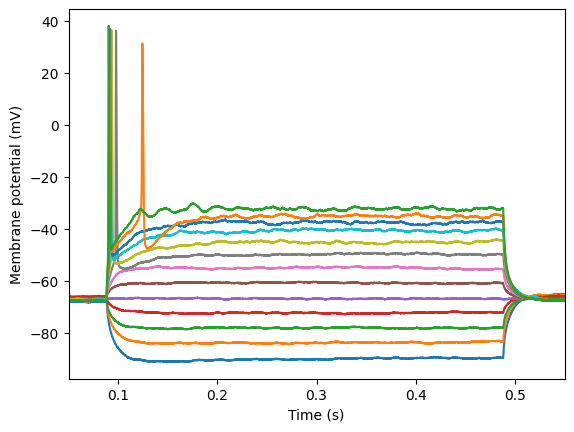

In [12]:
# Solution
def plot_data_zoom(file_path):
    data = get_io(file_path).read(lazy=True)
    for segment in data[0].segments:
        signal = segment.analogsignals[0].load()
        plt.plot(signal.times - signal.t_start, signal)
    plt.xlim(0.05, 0.55)
    plt.xlabel(f"Time ({signal.times.units.dimensionality})")
    plt.ylabel(f"Membrane potential ({signal.units.dimensionality})")

plot_data_zoom("downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf")

![title](Fig2.png)

**EXERCISE: Restrict the signal to 1 second? to 0.6 second?**

Hint: np.where()

In [ ]:
def plot_data_vs(file_path, value_second):
    ...
    ...
    plt.plot(signal.times[indices_vs]-signal.t_start, signal.magnitude[indices_vs])
    

plot_data_vs("downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf", 0.6)

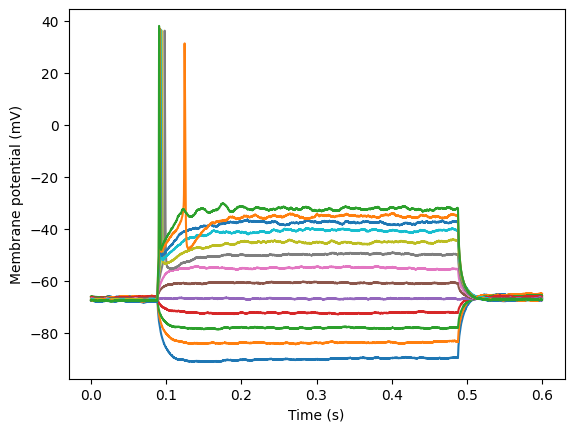

In [13]:
def plot_data_vs(file_path, value_second):
    data = get_io(file_path).read(lazy=True)
    for segment in data[0].segments:
        signal = segment.analogsignals[0].load()
        indices_vs = np.where((signal.times - signal.t_start) <= value_second)[0]
        plt.plot(signal.times[indices_vs]-signal.t_start, signal.magnitude[indices_vs])
    
    plt.xlabel(f"Time ({signal.times.units.dimensionality})")
    plt.ylabel(f"Membrane potential ({signal.units.dimensionality})")

plot_data_vs("downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf", 0.6)

### Data reuse with matplotlib

We recommend using Matplotlib or another widely adopted plotting library in the scientific community to create your figures. By doing so, you'll ensure that your code remains reusable and that your figures will be accessible well into the future, with less concern about discontinued support or compatibility issues.

In the following example, we demonstrate how Matplotlib can be used to achieve high-quality, customizable plots. We encourage you to adopt Matplotlib for your visualizations, keeping in mind the ease of sharing and replicating your code across different environments. You can also combine matplotlib to [Seaborn](https://seaborn.pydata.org/), a data vizualization library based on matplotlib.  

**EXERCISE: Complete the code below in order to plot the membrane potential over the current amplitudes?**

In [ ]:
mean_membrane_potential = [] 
value_second = 0.6

data = get_io('downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf').read(lazy=True)
for segment in data[0].segments:
    signal = segment.analogsignals[0].load()
    indices_vs = np.where((signal.times - signal.t_start) <= value_second)[0]

    mean_membrane_potential.append(...signal.magnitude[indices_vs])


# Layout 
plt.figure(figsize=(15, 10), dpi=80) 

colors = plt.cm.tab20(np.linspace(0, 1, 13))

plt.scatter(..., color= colors, zorder= ...)
plt.plot(...,'-', color = 'k', alpha = 0.5, zorder=1)
plt.xlabel(f"Currents (pA)", size = 15)
plt.ylabel(f"Mean Membrane potential ({signal.units.dimensionality})", size = 15)

ax = plt.gca()

ax.set_xlim(-250,450)
ax.set_xticks([-200,-100,0,100,200,300,400,450])
ax.set_xticklabels(['-200','-100','0','100','200','300','400', ' '], size = 12)
ax.tick_params(axis='x', which='major', size=5) 
ax.set_xticks([-250,-150,50,-50,150,250,350], minor=True) 
ax.tick_params(axis='x', which='minor', size=3) 

ax.set_ylim(-85,-40)
ax.set_yticks([-80,-70,-60,-50,-40])
ax.set_yticklabels(['-80','-70','-60','-50','-40'], size = 12)
ax.tick_params(axis='y', which='major', size=5) 
ax.set_yticks([-85,-75,-65,-55,-45], minor=True) 
ax.tick_params(axis='y', which='minor', size=3) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()

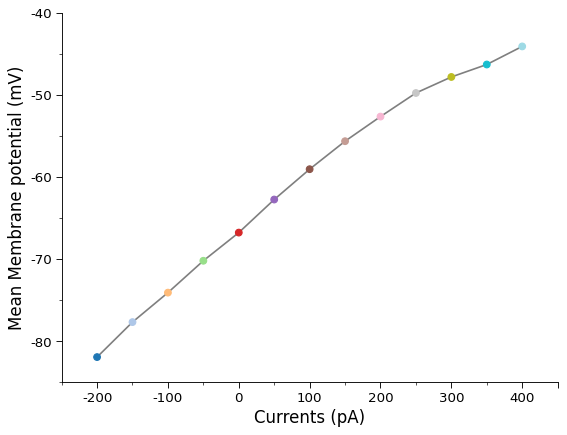

In [14]:
import matplotlib.pyplot as plt

# This example focuses on the vizualization not the data analysis 

mean_membrane_potential = []
value_second = 0.6

data = get_io('downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf').read(lazy=True)
for segment in data[0].segments:
    signal = segment.analogsignals[0].load()
    indices_1s = np.where((signal.times - signal.t_start) <= value_second)[0]
    mean_membrane_potential.append(np.mean(signal.magnitude[indices_1s]))

# Layout 
plt.figure(figsize=(8, 6), dpi=80) # Learn more on dpi here: [Relationship between dpi and figure size](https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size)

colors = plt.cm.tab20(np.linspace(0, 1, 13)) # for more colors: [Matplotlib Colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

plt.scatter(current_pulse_amplitudes,mean_membrane_potential, color= colors, zorder= 2)
plt.plot(current_pulse_amplitudes,mean_membrane_potential,'-', color = 'k', alpha = 0.5, zorder=1)
plt.xlabel(f"Currents (pA)", size = 15)
plt.ylabel(f"Mean Membrane potential ({signal.units.dimensionality})", size = 15)

ax = plt.gca() # Learn more on gca here: [Matplotlib gca](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html)

ax.set_xlim(-250,450)
ax.set_xticks([-200,-100,0,100,200,300,400,450])
ax.set_xticklabels(['-200','-100','0','100','200','300','400', ' '], size = 12)
ax.tick_params(axis='x', which='major', size=5) 
ax.set_xticks([-250,-150,50,-50,150,250,350], minor=True) 
ax.tick_params(axis='x', which='minor', size=3) 

ax.set_ylim(-85,-40)
ax.set_yticks([-80,-70,-60,-50,-40])
ax.set_yticklabels(['-80','-70','-60','-50','-40'], size = 12)
ax.tick_params(axis='y', which='major', size=5) 
ax.set_yticks([-85,-75,-65,-55,-45], minor=True) 
ax.tick_params(axis='y', which='minor', size=3) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**EXERCISE: Reproduce this figure**

HINT:

from matplotlib.ticker import MultipleLocator

for i in range(len(current_pulse_amplitudes)):
    plt.annotate(f'{annotation_points[i]}', 
                 (current_pulse_amplitudes[i], mean_membrane_potential[i]),        
                 textcoords="offset points", 
                 xytext=(5,-10),       
                 ha='left')        

ax = gca()

ax.set_xlim(-250,450)
ax.set_xticks([-200,-100,0,100,200,300,400,450])
ax.set_xticklabels(['-200','-100','0','100','200','300','400', ' '], size = 12)
ax.tick_params(axis='...', which='...', size=5) 
ax.set_xticks([-250,-150,50,-50,150,250,350], minor=True) 
ax.tick_params(axis='...', which='...', size=3) 

ax.set_ylim(-85,-40)
ax.set_yticks([-80,-70,-60,-50,-40])
ax.set_yticklabels(['-80','-70','-60','-50','-40'], size = 12)
ax.set_yticks([-85,-75,-65,-55,-45], minor=True) 
ax.yaxis.set_minor_locator(...(1))   
ax.yaxis.set_major_locator(...(5))   
ax.tick_params(axis='...', which='minor', size=3) 
ax.tick_params(axis='...', which='major', size=5) 

ax.spines['...'].set_visible(False)
ax.spines['...'].set_visible(False)

plt.show()

![title](Figmatplotlib.png) 


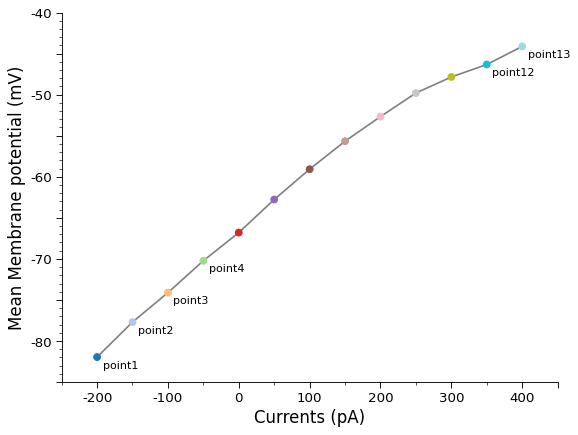

In [15]:
from matplotlib.ticker import MultipleLocator


mean_membrane_potential = []
value_second = 0.6

data = get_io('downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf').read(lazy=True)
for segment in data[0].segments:
    signal = segment.analogsignals[0].load()
    indices_1s = np.where((signal.times - signal.t_start) <= value_second)[0]

    mean_membrane_potential.append(np.mean(signal.magnitude[indices_1s]))

# Plot & layout  
# 
# Main Graph
plt.figure(figsize=(8, 6), dpi=80)  
colors = plt.cm.tab20(np.linspace(0, 1, 13))
plt.scatter(current_pulse_amplitudes,mean_membrane_potential, color= colors, zorder= 2)
plt.plot(current_pulse_amplitudes,mean_membrane_potential,'-', color = 'k', alpha = 0.5, zorder=1)
plt.xlabel(f"Currents (pA)", size = 15)
plt.ylabel(f"Mean Membrane potential ({signal.units.dimensionality})", size = 15)

# Graph Annotations
# 
# Here more information: [Matplotlib annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)
annotation_points = ['point1','point2','point3','point4',' ',' ',' ',' ',' ',' ',' ','point12','point13']
for i in range(len(current_pulse_amplitudes)):
    plt.annotate(f'{annotation_points[i]}', 
                 (current_pulse_amplitudes[i], mean_membrane_potential[i]),        
                 textcoords="offset points", 
                 xytext=(5,-10),       
                 ha='left')        

# Layout
ax = plt.gca()

ax.set_xlim(-250,450)
ax.set_xticks([-200,-100,0,100,200,300,400,450])
ax.set_xticklabels(['-200','-100','0','100','200','300','400', ' '], size = 12)
ax.tick_params(axis='x', which='major', size=5) 
ax.set_xticks([-250,-150,50,-50,150,250,350], minor=True) 
ax.tick_params(axis='x', which='minor', size=3) 

ax.set_ylim(-85,-40)
ax.set_yticks([-80,-70,-60,-50,-40])
ax.set_yticklabels(['-80','-70','-60','-50','-40'], size = 12)
ax.set_yticks([-85,-75,-65,-55,-45], minor=True) 
ax.yaxis.set_minor_locator(MultipleLocator(1))   
ax.yaxis.set_major_locator(MultipleLocator(5))   
ax.tick_params(axis='y', which='minor', size=3) 
ax.tick_params(axis='y', which='major', size=5) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**EXERCISE: Create subplots next to the points by filling the gaps**

In [ ]:
# Fill the gaps: 

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mean_membrane_potential = []
value_second = 0.6

data = get_io('downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf').read(lazy=True)
for segment in data[0].segments:
    signal = segment.analogsignals[0].load()
    indices_1s = np.where((signal.times - signal.t_start) <= value_second)[0]

    mean_membrane_potential.append(np.mean(signal.magnitude[indices_1s]))

# Plot & layout  
# 
fig, ax = plt.subplots(figsize=(18, 12))  

# Main Graph  
colors = plt.cm.tab20(np.linspace(0, 1, 13))
plt.scatter(current_pulse_amplitudes,mean_membrane_potential, color= colors, zorder= 2)
plt.plot(current_pulse_amplitudes,mean_membrane_potential,'-', color = 'k', alpha = 0.5, zorder=1)
plt.xlabel(f"Currents (pA)", size = 15)
plt.ylabel(f"Mean Membrane potential ({signal.units.dimensionality})", size = 15)

# Graph Annotations
annotation_points = ['point1','point2','point3','point4',' ',' ',' ',' ',' ',' ',' ','point12','point13']
for i in range(len(current_pulse_amplitudes)):
    plt.annotate(f'{annotation_points[i]}', 
                 (current_pulse_amplitudes[i], mean_membrane_potential[i]),        
                 textcoords="offset points", 
                 xytext=(-15,2),       
                 ha='right',
                 size=15)        

# Subplots  
for i, segment in enumerate(data[0].segments):
    signal = segment.analogsignals[0].load()
    indices_vs = np.where((signal.times - signal.t_start) <= value_second)[0]

    signal_vs = signal.magnitude[indices_vs]
    time_vs = signal.times[indices_vs]

    # creates boxes next to each point
    inset = inset_axes(ax,
                       width="200%", height="100%",
                       loc="...",
                       bbox_to_anchor=(current_pulse_amplitudes[i], mean_membrane_potential[i], 20, 3),  # Anchor the box
                       bbox_transform=ax.transData, 
                       borderpad=5)
    
    # inserts plots in boxes
    inset.plot(...,  color=colors[i])
    
    # Remove spines of all boxes
    for spine in inset.spines.values():
        spine.set...
    
    # Remove ticks for all boxes
    inset.set_xticks([])

# Move the main axes
ax.spines['bottom']...(('data',-87))
ax.spines['left']....(('data',-250))

#
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(-250,450)
ax.set_xticks([-200,-100,0,100,200,300,400,450])
ax.set_xticklabels(['-200','-100','0','100','200','300','400', ' '], size = 12)
ax.tick_params(axis='x', which='major', size=7) 
ax.set_xticks([-250,-150,50,-50,150,250,350], minor=True) 
ax.tick_params(axis='x', which='minor', size=5) 

ax.set_ylim(-87,-40)
ax.set_yticks([-80,-70,-60,-50,-40])
ax.set_yticklabels(['-80','-70','-60','-50','-40'], size = 12)
ax.tick_params(axis='y', which='major', size=7) 
ax.set_yticks([-85,-75,-65,-55,-45], minor=True) 
ax.tick_params(axis='y', which='minor', size=5) 
ax.yaxis.set_minor_locator(MultipleLocator(1))   
ax.yaxis.set_major_locator(MultipleLocator(5))   

plt.show()

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

mean_membrane_potential = []
value_second = 0.6

data = get_io('downloads/APPPS1_mouse_model_3-4_months/191129000_S23.abf').read(lazy=True)
for segment in data[0].segments:
    signal = segment.analogsignals[0].load()
    indices_1s = np.where((signal.times - signal.t_start) <= value_second)[0]
    mean_membrane_potential.append(np.mean(signal.magnitude[indices_1s]))

# Plot & layout  
# 
fig, ax = plt.subplots(figsize=(18, 12), dpi=80)  

# Main Graph  
colors = plt.cm.tab20(np.linspace(0, 1, 13))
plt.scatter(current_pulse_amplitudes,mean_membrane_potential, color= colors, zorder= 2)
plt.plot(current_pulse_amplitudes,mean_membrane_potential,'-', color = 'k', alpha = 0.5, zorder=1)
plt.xlabel(f"Currents (pA)", size = 15)
plt.ylabel(f"Mean Membrane potential ({signal.units.dimensionality})", size = 15)

# Graph Annotations
annotation_points = ['point1','point2','point3','point4',' ',' ',' ',' ',' ',' ',' ','point12','point13']
for i in range(len(current_pulse_amplitudes)):
    plt.annotate(f'{annotation_points[i]}', 
                 (current_pulse_amplitudes[i], mean_membrane_potential[i]),        
                 textcoords="offset points", 
                 xytext=(-15,2),       
                 ha='right',
                 size=15)        

# Subplots  
for i, segment in enumerate(data[0].segments):
    signal = segment.analogsignals[0].load()
    indices_vs = np.where((signal.times - signal.t_start) <= value_second)[0]

    signal_vs = signal.magnitude[indices_vs]
    time_vs = signal.times[indices_vs]

    # creates boxes next to each point
    #
    # learn more on inset_axes: [Matplotlib inset_axes](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.inset_axes.html)(https://matplotlib.org/stable/gallery/axes_grid1/inset_locator_demo.html)
    inset = inset_axes(ax,
                       width="200%", height="100%",
                       loc="upper left",
                       bbox_to_anchor=(current_pulse_amplitudes[i], mean_membrane_potential[i], 20, 3),  # Anchor the box
                       bbox_transform=ax.transData, 
                       borderpad=5)
    
    # inserts plots in boxes
    inset.plot(time_vs,signal_vs,  color=colors[i])
    
    # Remove spines of all boxes
    for spine in inset.spines.values():
        spine.set_visible(False)
    
    # Remove ticks for all boxes
    inset.set_xticks([])
    inset.set_yticks([])

# Move the main axes
ax.spines['bottom'].set_position(('data',-87))
ax.spines['left'].set_position(('data',-250))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(-250,450)
ax.set_xticks([-200,-100,0,100,200,300,400,450])
ax.set_xticklabels(['-200','-100','0','100','200','300','400', ' '], size = 12)
ax.tick_params(axis='x', which='major', size=7) 
ax.set_xticks([-250,-150,50,-50,150,250,350], minor=True) 
ax.tick_params(axis='x', which='minor', size=5) 

ax.set_ylim(-87,-40)
ax.set_yticks([-80,-70,-60,-50,-40])
ax.set_yticklabels(['-80','-70','-60','-50','-40'], size = 12)
ax.tick_params(axis='y', which='major', size=7) 
ax.set_yticks([-85,-75,-65,-55,-45], minor=True) 
ax.tick_params(axis='y', which='minor', size=5) 
ax.yaxis.set_minor_locator(MultipleLocator(1))   
ax.yaxis.set_major_locator(MultipleLocator(5))   

# Comments: don't forget to put the legend with plt.legend(): [Matplotlib legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

plt.show()

### Creating a Neo object

In this last section, we will create a Neo object from hypothetical data provided in the Minischool_NeuralNet2024_data_example.xlsx file.\
This tutorial will demonstrate how to structure tand obtain an object. To go further and to have more insight of sharing data in an open format you can consult [Sharing neuroscience data in an open format](https://neo.readthedocs.io/en/latest/share_data.html).Additionally, you can find how to convert NIX format to NWB and vice-versa [NIX-NWB](https://github.com/G-Node/nix-nwb)

Let us start!\
We use pandas package to acces and visualize the data. 

In [ ]:
import pandas as pd
df_data = pd.read_excel("Minischool_NeuralNet2024_data_example.xlsx")
df_data

To do so, we create a function to convert the pandas columns into numpy arrays. The function also store the array in a dictionnary to facilitate the accessibility. 

In [ ]:
def pandas_to_numpy(df):
    arrays = {}
    for col in df.columns:
        arrays[col] = df[col].to_numpy()
    return arrays


Let's have a look: 

In [ ]:
data = pandas_to_numpy(df_data)
data.keys()

We will now create the Neo object according to the structure explained above:\
We start with formating the signals in AnalogSignals

In [ ]:
from neo.core import AnalogSignal,Segment,Block
import quantities as pq

sig0 = AnalogSignal(data['Signal 1'], units='V', sampling_rate=1000*pq.Hz, t_start=0*pq.ms)
sig1 = AnalogSignal(data['Signal 2'], units='V', sampling_rate=1000*pq.Hz, t_start=0*pq.ms)
sig2 = AnalogSignal(data['Signal 3'], units='V', sampling_rate=1000*pq.Hz, t_start=0*pq.ms)
sig3 = AnalogSignal(data['Signal 4'], units='V', sampling_rate=1000*pq.Hz, t_start=0*pq.ms)
sig4 = AnalogSignal(data['Signal 5'], units='V', sampling_rate=1000*pq.Hz, t_start=0*pq.ms)
sig4
    

And then, we create the block containing 1 segment and 5 signals(analogsignals)

In [ ]:
blk = Block()
for ind in range(1):
    seg = Segment(name='segment %d' % ind, index=5)
    blk.segments.append(seg)

Now, let's add signals. 

In [ ]:
for seg in blk.segments:
    seg.analogsignals.append(sig0)
    seg.analogsignals.append(sig1)
    seg.analogsignals.append(sig2)
    seg.analogsignals.append(sig3)
    seg.analogsignals.append(sig4)

We can now have a look of the full structure

In [ ]:
for i in range(0,5):
    signal = blk.segments[0].analogsignals[i]
    plt.plot(signal.times, signal)
plt.xlabel(f"Time ({sig.times.units.dimensionality})")
plt.ylabel(f"Membrane potential ({sig.units.dimensionality})")  


To go further, you can check this example: https://neo.readthedocs.io/en/latest/share_data.html#nix